This notebook enables to plot the training curves of the different neural networks.

In [1]:
import pickle

import glob2
import numpy as np
from matplotlib import pyplot as plt

In [2]:
path = "/directory/to/model/history"
metric = "val_auc"  # "var_Accuracy", "val_accuracy_for_segmenter" or "val_auc_for_segmenter"

In [3]:
histories = []
for h in glob2.glob(f"{path}/FOLD*/*.pkl"):
    with open(h, 'rb') as f:
        histories.append(pickle.load(f))

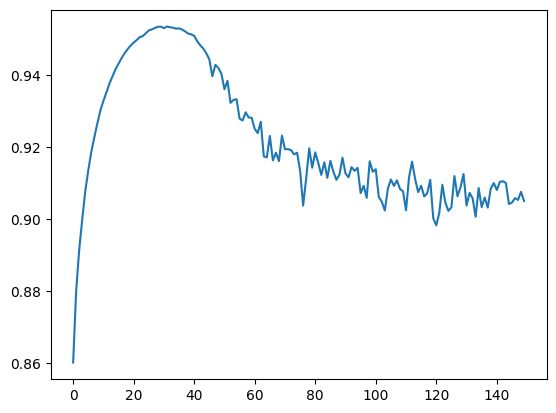

In [4]:
# rename metrics artifacted like "val_auc_for_segmenter_2" to "val_auc_for_segmenter"
for h in histories:
    to_add = []
    for k in h.keys():
        if metric in k and metric != k:
            to_add.append(k)
    for k in to_add:
        h[metric] = h[k]

# averages the metrics in the different folds
mean = np.array(histories[0][metric])
for h in histories[1:]:
    mean += np.array(h[metric])
mean /= len(histories)
plt.plot(mean)

In [5]:
# get maximum epoch
print(np.argmax(mean))
print(np.max(mean))

31
0.953425931930542
